In [1]:
# Dependencies
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
filepath = 'hate_crime.csv'
df = pd.read_csv(filepath, low_memory=False)
df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [3]:
filtered_df = df[['DATA_YEAR', 'STATE_ABBR', 'OFFENDER_RACE', 'VICTIM_TYPES', 'BIAS_DESC', 
                  'VICTIM_COUNT', 'TOTAL_OFFENDER_COUNT']]
filtered_df.head()

,DATA_YEAR,STATE_ABBR,OFFENDER_RACE,VICTIM_TYPES,BIAS_DESC,VICTIM_COUNT,TOTAL_OFFENDER_COUNT
0,1991,AR,White,Individual,Anti-Black or African American,1,1
1,1991,AR,Black or African American,Individual,Anti-White,1,1
2,1991,AR,Black or African American,Individual,Anti-Black or African American,1,1
3,1991,AR,Black or African American,Individual,Anti-White,2,1
4,1991,AR,Black or African American,Individual,Anti-White,1,1


In [4]:
years_df = filtered_df[(filtered_df['DATA_YEAR'] >= 2014) & (df['DATA_YEAR'] <= 2018)]
years_df

,DATA_YEAR,STATE_ABBR,OFFENDER_RACE,VICTIM_TYPES,BIAS_DESC,VICTIM_COUNT,TOTAL_OFFENDER_COUNT
169146,2014,AK,Unknown,Individual,Anti-Gay (Male),2,0
169147,2014,AK,White,Individual,Anti-American Indian or Alaska Native,1,2
169148,2014,AK,White,Individual,Anti-Black or African American,1,1
169149,2014,AK,Black or African American,Individual,Anti-American Indian or Alaska Native,2,2
169150,2014,AK,White,Individual,Anti-American Indian or Alaska Native,1,2
...,...,...,...,...,...,...,...
201398,2018,WV,Unknown,Individual,Anti-Black or African American,1,0
201399,2018,WV,White,Individual,Anti-Black or African American,1,1
201400,2018,WV,Unknown,Individual,Anti-Asian,1,0
201401,2018,WV,White,Law Enforcement Officer,Anti-White,1,1


In [5]:
types = years_df['VICTIM_TYPES'].value_counts()
types = pd.DataFrame(types).sort_index().rename(columns={'VICTIM_TYPES':'Total'})

types14 = years_df.loc[years_df['DATA_YEAR'] == 2014,:]['VICTIM_TYPES'].value_counts()
types14_df = pd.DataFrame(types14).sort_index().rename(columns={'VICTIM_TYPES':'2014'})

types15 = years_df.loc[years_df['DATA_YEAR'] == 2015,:]['VICTIM_TYPES'].value_counts()
types15_df = pd.DataFrame(types15).sort_index().rename(columns={'VICTIM_TYPES':'2015'})

types16 = years_df.loc[years_df['DATA_YEAR'] == 2016,:]['VICTIM_TYPES'].value_counts()
types16_df = pd.DataFrame(types16).sort_index().rename(columns={'VICTIM_TYPES':'2016'})

types17 = years_df.loc[years_df['DATA_YEAR'] == 2017,:]['VICTIM_TYPES'].value_counts()
types17_df = pd.DataFrame(types17).sort_index().rename(columns={'VICTIM_TYPES':'2017'})

types18 = years_df.loc[years_df['DATA_YEAR'] == 2018,:]['VICTIM_TYPES'].value_counts()
types18_df = pd.DataFrame(types18).sort_index().rename(columns={'VICTIM_TYPES':'2018'})

types_df = pd.concat([types, types14_df, types15_df, types16_df, types17_df, types18_df], axis=1)
type_count = types_df.dropna().reset_index().rename(columns={'index': 'Victim Types'})
type_plot = type_count.loc[type_count['Total']>=750, :].sort_values(by=['Total'], 
                                ascending=False).reset_index(drop=True)
type_plot

,Victim Types,Total,2014,2015,2016,2017,2018
0,Individual,25184,4455.0,4731.0,4888.0,5455.0,5655.0
1,Other,2119,412.0,382.0,433.0,501.0,391.0
2,Business,1896,309.0,296.0,389.0,514.0,388.0
3,Government,1029,147.0,141.0,226.0,295.0,220.0
4,Religious Organization,789,147.0,179.0,146.0,167.0,150.0


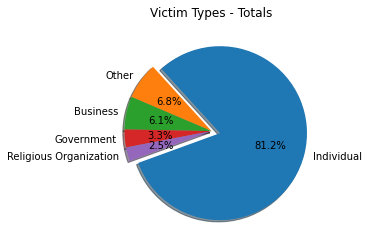

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a pie chart
labels = type_plot['Victim Types']
explode = (0.1, 0, 0, 0, 0)
type_total = type_plot['Total']
plt.pie(type_total, labels=labels, explode=explode, autopct="%1.1f%%", shadow=True, startangle=200)
plt.title("Victim Types - Totals")
plt.show()
plt.savefig('Charts/totalpie.png')

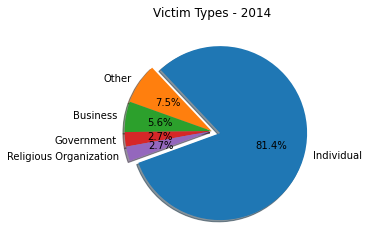

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a pie chart
labels = type_plot['Victim Types']
explode = (0.1, 0, 0, 0, 0)
types14 = type_plot['2014']
plt.pie(types14, labels=labels, explode=explode, autopct="%1.1f%%", shadow=True, startangle=200)
plt.title("Victim Types - 2014")
plt.show()
plt.savefig('Charts/2014pie.png')

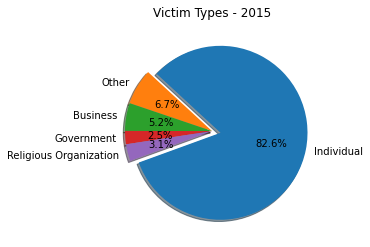

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a pie chart
labels = type_plot['Victim Types']
explode = (0.1, 0, 0, 0, 0)
types15 = type_plot['2015']
plt.pie(types15, labels=labels, explode=explode, autopct="%1.1f%%", shadow=True, startangle=200)
plt.title("Victim Types - 2015")
plt.show()
plt.savefig('Charts/2015pie.png')

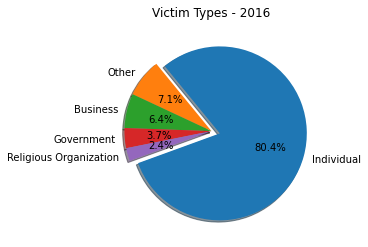

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a pie chart
labels = type_plot['Victim Types']
explode = (0.1, 0, 0, 0, 0)
types16 = type_plot['2016']
plt.pie(types16, labels=labels, explode=explode, autopct="%1.1f%%", shadow=True, startangle=200)
plt.title("Victim Types - 2016")
plt.show()
plt.savefig('Charts/2016pie.png')

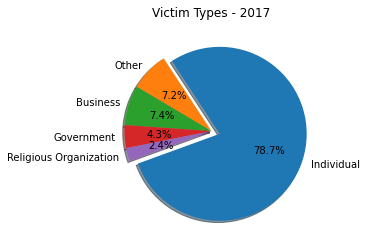

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a pie chart
labels = type_plot['Victim Types']
explode = (0.1, 0, 0, 0, 0)
types17 = type_plot['2017']
plt.pie(types17, labels=labels, explode=explode, autopct="%1.1f%%", shadow=True, startangle=200)
plt.title("Victim Types - 2017")
plt.show()
plt.savefig('Charts/2017pie.png')

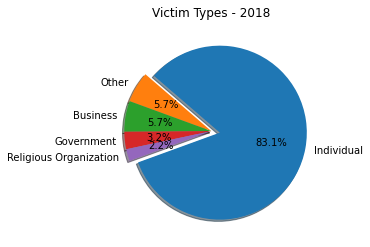

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a pie chart
labels = type_plot['Victim Types']
explode = (0.1, 0, 0, 0, 0)
types18 =type_plot['2018']
plt.pie(types18, labels=labels, explode=explode, autopct="%1.1f%%", shadow=True, startangle=200)
plt.title("Victim Types - 2018")
plt.show()
plt.savefig('Charts/2018pie.png')

In [15]:
per_change1 = (((type_plot['2015']) - (type_plot['2014'])) / (type_plot['2014'])).round(3)
per_change2 = (((type_plot['2016']) - (type_plot['2015'])) / (type_plot['2015'])).round(3)
per_change3 = (((type_plot['2017']) - (type_plot['2016'])) / (type_plot['2016'])).round(3)
per_change4 = (((type_plot['2018']) - (type_plot['2017'])) / (type_plot['2017'])).round(3)

change_df = {
    "% chg 14 to 15":per_change1,
    "% chg 15 to 16":per_change2,
    "% chg 16 to 17":per_change3,
    "% chg 17 to 18":per_change4
}
change_df = pd.DataFrame(change_df, columns=change_df.keys())
def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color
type_chart = change_df.set_index((type_plot['Victim Types'])).style.format('{:.2%}').applymap(color_negative_red)
type_chart

,% chg 14 to 15,% chg 15 to 16,% chg 16 to 17,% chg 17 to 18
Victim Types,,,,
Individual,6.20%,3.30%,11.60%,3.70%
Other,-7.30%,13.40%,15.70%,-22.00%
Business,-4.20%,31.40%,32.10%,-24.50%
Government,-4.10%,60.30%,30.50%,-25.40%
Religious Organization,21.80%,-18.40%,14.40%,-10.20%
